# First song recommender for Billboard Top 100 

In [1]:
# 1. importing libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd
import random
import getpass

In [2]:
# 2. finding the url and storing it in a variable
url = "https://www.billboard.com/charts/hot-100"

In [3]:
# 3. downloading html with a get request
response = requests.get(url)
response.status_code

200

In [4]:
# 4. parsing html (create the 'soup')
soup = BeautifulSoup(response.content, "html.parser")

In [5]:
# 5. retrieveing data
# song titles
songs = soup.select("button > span.chart-element__information > span.chart-element__information__song.text--truncate.color--primary")
# artists
artists = soup.select("button > span.chart-element__information > span.chart-element__information__artist.text--truncate.color--secondary")

In [6]:
songs_list = [song.get_text() for song in songs]
artists_list = [artist.get_text() for artist in artists]

In [7]:
top100 = pd.DataFrame({"Title":songs_list,
             "Artist":artists_list})

In [8]:
top100

,Title,Artist
0,Butter,BTS
1,Good 4 U,Olivia Rodrigo
2,Levitating,Dua Lipa Featuring DaBaby
3,Kiss Me More,Doja Cat Featuring SZA
4,Montero (Call Me By Your Name),Lil Nas X
...,...,...
95,All I Know So Far,P!nk
96,What's Next,Drake
97,Enough For You,Olivia Rodrigo
98,Juggernaut,"Tyler, The Creator Featuring Lil Uzi Vert & Ph..."


In [9]:
top100.shape

(100, 2)

# Second recommender for second song list

In [10]:
playlist=pd.read_csv('Spotify-2000.csv')

In [11]:
playlist=playlist.drop(columns='Index')

In [12]:
playlist.head()

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [13]:
import pandas as pd
from sklearn import datasets

In [14]:
playlist.keys()

Index(['Title', 'Artist', 'Top Genre', 'Year', 'Beats Per Minute (BPM)',
       'Energy', 'Danceability', 'Loudness (dB)', 'Liveness', 'Valence',
       'Length (Duration)', 'Acousticness', 'Speechiness', 'Popularity'],
      dtype='object')

In [15]:
playlist.head()

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [16]:
#dataframe with the numerical values

numval = playlist[["Year","Beats Per Minute (BPM)","Energy","Danceability","Loudness (dB)","Liveness","Valence","Length (Duration)","Acousticness","Speechiness","Popularity"]]
numval2 = playlist[["Year","Beats Per Minute (BPM)","Energy","Danceability","Loudness (dB)","Liveness","Valence","Length (Duration)","Acousticness","Speechiness","Popularity"]]


In [17]:
numval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Year                    1994 non-null   int64 
 1   Beats Per Minute (BPM)  1994 non-null   int64 
 2   Energy                  1994 non-null   int64 
 3   Danceability            1994 non-null   int64 
 4   Loudness (dB)           1994 non-null   int64 
 5   Liveness                1994 non-null   int64 
 6   Valence                 1994 non-null   int64 
 7   Length (Duration)       1994 non-null   object
 8   Acousticness            1994 non-null   int64 
 9   Speechiness             1994 non-null   int64 
 10  Popularity              1994 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 171.5+ KB


In [ ]:
numval['Length (Duration)']=numval['Length (Duration)'].str.replace(',','').apply(pd.to_numeric)

In [19]:
X=pd.DataFrame(numval)

In [20]:
X.head()

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,2004,157,30,53,-14,11,68,201,94,3,71
1,2000,135,79,50,-11,17,81,207,17,7,39
2,2001,168,69,66,-9,7,52,341,2,17,69
3,2007,173,96,43,-4,3,37,269,0,4,76
4,2002,106,82,58,-5,10,87,256,1,3,59


# K means clustering to identify similarities among song attributes

ValueError: x and y must have same first dimension, but have shapes (48,) and (35,)

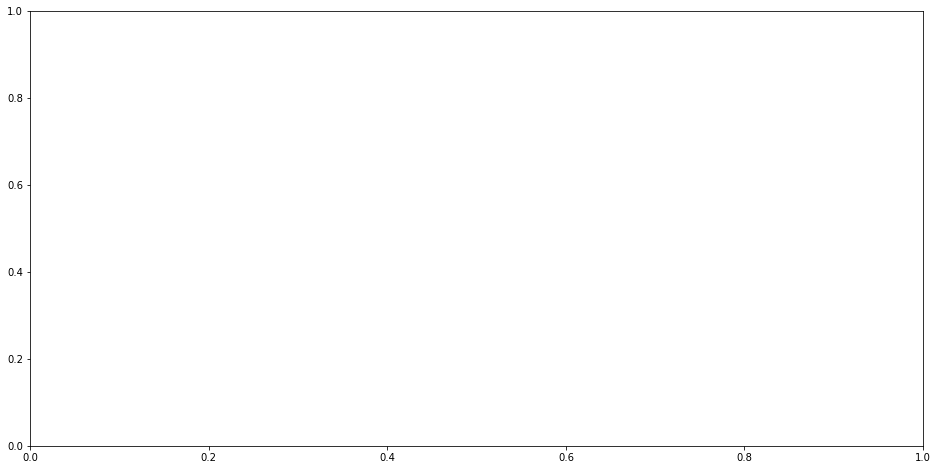

In [38]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method to find an optimal k number')

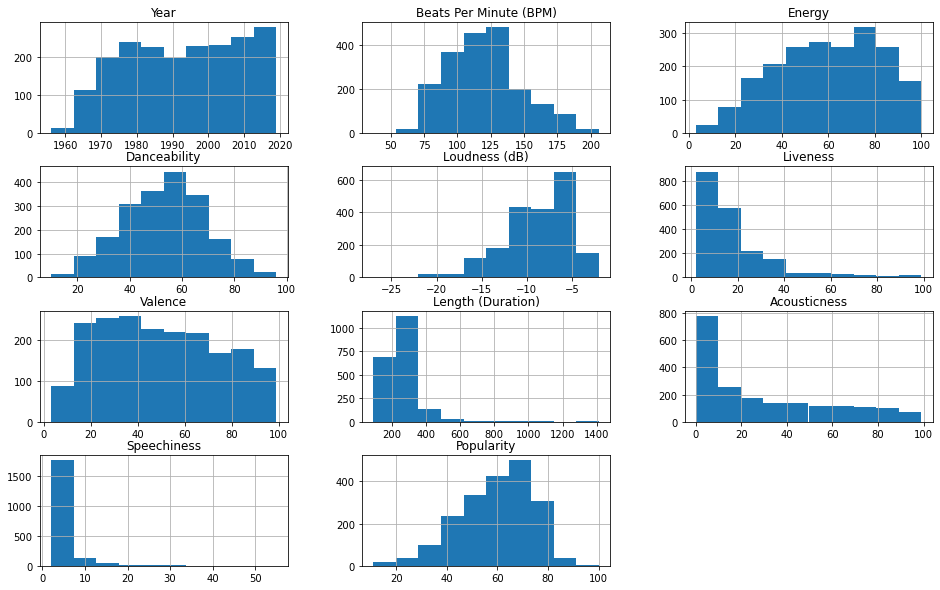

In [39]:
X.hist(figsize=(16,10));

In [40]:
X.describe()

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.00000
mean,1992.992979,120.215647,59.679539,53.238215,-9.008526,19.012036,49.408726,262.443330,28.858074,4.994985,59.52658
std,16.116048,28.028096,22.154322,15.351507,3.647876,16.727378,24.858212,93.604387,29.011986,4.401566,14.35160
min,1956.000000,37.000000,3.000000,10.000000,-27.000000,2.000000,3.000000,93.000000,0.000000,2.000000,11.00000
25%,1979.000000,99.000000,42.000000,43.000000,-11.000000,9.000000,29.000000,212.000000,3.000000,3.000000,49.25000
50%,1993.000000,119.000000,61.000000,53.000000,-8.000000,12.000000,47.000000,245.000000,18.000000,4.000000,62.00000
75%,2007.000000,136.000000,78.000000,64.000000,-6.000000,23.000000,69.750000,289.000000,50.000000,5.000000,71.00000
max,2019.000000,206.000000,100.000000,96.000000,-2.000000,99.000000,99.000000,1412.000000,99.000000,55.000000,100.00000


In [41]:
numval.head()

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,2004,157,30,53,-14,11,68,201,94,3,71
1,2000,135,79,50,-11,17,81,207,17,7,39
2,2001,168,69,66,-9,7,52,341,2,17,69
3,2007,173,96,43,-4,3,37,269,0,4,76
4,2002,106,82,58,-5,10,87,256,1,3,59


In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
X_prep = StandardScaler().fit_transform(numval)
X_prep_df = pd.DataFrame(X_prep)
X_prep_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.683156,1.312739,-1.340009,-0.015521,-1.368667,-0.479098,0.748080,-0.656580,2.245908,-0.453358,0.799653
1,0.434894,0.527616,0.872304,-0.210991,-0.546064,-0.120314,1.271177,-0.592464,-0.408833,0.455637,-1.430623
2,0.496960,1.705301,0.420812,0.831514,0.002338,-0.718286,0.104268,0.839452,-0.925990,2.728126,0.660261
3,0.869353,1.883738,1.639841,-0.667086,1.373342,-0.957475,-0.499305,0.070064,-0.994944,-0.226109,1.148133
4,0.559025,-0.507320,1.007752,0.310261,1.099141,-0.538895,1.512607,-0.068853,-0.960467,-0.453358,-0.036701


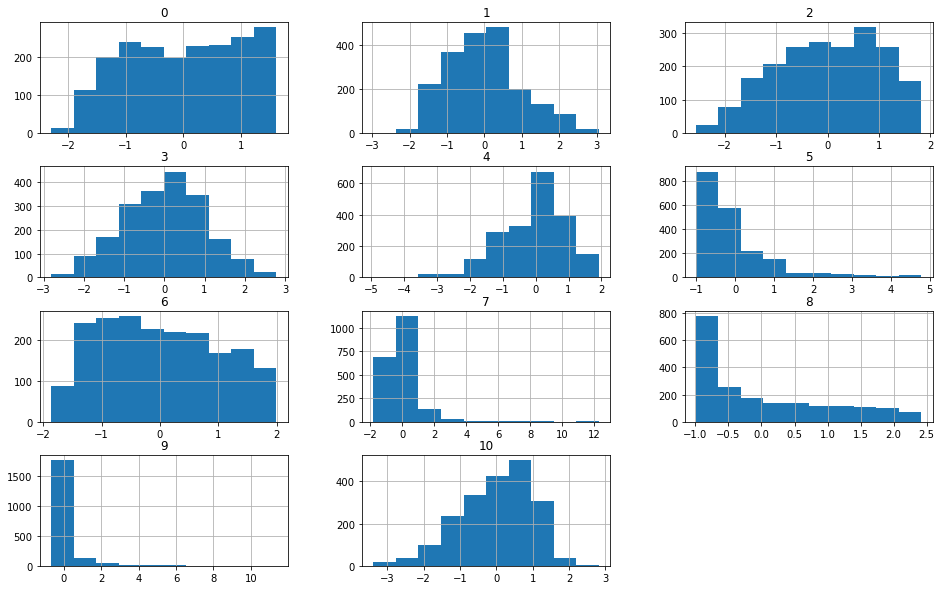

In [44]:
X_prep_df.hist(figsize=(16,10));

In [45]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=23, random_state=40)
kmeans.fit(X_prep_df)

KMeans(n_clusters=23, random_state=40)

In [46]:
clusters = kmeans.predict(X_prep_df)

In [47]:
pd.Series(clusters).value_counts().sort_index()

0     110
1     123
2     147
3      46
4      67
5     140
6      82
7     137
8      72
9     132
10     55
11     37
12      8
13     96
14     99
15     79
16     95
17     68
18     62
19     20
20     98
21     95
22    126
dtype: int64

In [48]:
K = range(2, 50)

inertia = []

for k in K:
    kmeans=KMeans(n_clusters=k, random_state=40)
    kmeans.fit(X_prep_df)
    inertia.append(kmeans.inertia_)
    
print(inertia)

[18266.385412533902, 16703.75089307082, 15486.638013631424, 14431.11751397563, 13673.577885998984, 12939.831637819168, 12336.103802175521, 11842.833573687498, 11427.174525617726, 11060.023036651432, 10765.416246739504, 10504.64878336468, 10276.531141042447, 10049.158228098135, 9851.868188229766, 9672.897785773777, 9516.473705665414, 9350.125598339424, 9202.081388440085, 9116.45185506011, 8985.059753738522, 8835.475662167493, 8749.220762800736, 8635.294344187374, 8539.694496736878, 8467.301271630038, 8400.631336093826, 8304.331757161188, 8251.698559973953, 8118.829780574827, 8040.682725890577, 7971.517749676425, 7901.740090671648, 7845.7505368465345, 7803.838016949041, 7747.540696110668, 7655.576984158829, 7576.304406650991, 7555.327697004903, 7492.151371902398, 7442.19191029317, 7389.929489263726, 7365.182108889737, 7311.50842986176, 7220.691232022738, 7207.350003011432, 7161.104186523141, 7121.918120328621]


In [49]:
numval['clusters'] = clusters

<ipython-input-49-62d90b8e7126>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numval['clusters'] = clusters


In [50]:
numval.head()

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,clusters
0,2004,157,30,53,-14,11,68,201,94,3,71,8
1,2000,135,79,50,-11,17,81,207,17,7,39,9
2,2001,168,69,66,-9,7,52,341,2,17,69,3
3,2007,173,96,43,-4,3,37,269,0,4,76,21
4,2002,106,82,58,-5,10,87,256,1,3,59,13


In [51]:
pd.concat([playlist,numval], axis=1)

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,...,Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,clusters
0,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,...,30,53,-14,11,68,201,94,3,71,8
1,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,...,79,50,-11,17,81,207,17,7,39,9
2,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,...,69,66,-9,7,52,341,2,17,69,3
3,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,...,96,43,-4,3,37,269,0,4,76,21
4,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,...,82,58,-5,10,87,256,1,3,59,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,...,21,70,-12,11,72,128,84,7,63,6
1990,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,95,...,76,36,-8,76,95,136,73,6,69,15
1991,Johnny B. Goode,Chuck Berry,blues rock,1959,168,80,53,-9,31,97,...,80,53,-9,31,97,162,74,7,74,18
1992,Take Five,The Dave Brubeck Quartet,bebop,1959,174,26,45,-13,7,60,...,26,45,-13,7,60,324,54,4,65,8


In [52]:
playlist_2 = pd.concat([playlist,numval], axis=1)

In [53]:
playlist_2

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,...,Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,clusters
0,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,...,30,53,-14,11,68,201,94,3,71,8
1,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,...,79,50,-11,17,81,207,17,7,39,9
2,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,...,69,66,-9,7,52,341,2,17,69,3
3,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,...,96,43,-4,3,37,269,0,4,76,21
4,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,...,82,58,-5,10,87,256,1,3,59,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,...,21,70,-12,11,72,128,84,7,63,6
1990,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,95,...,76,36,-8,76,95,136,73,6,69,15
1991,Johnny B. Goode,Chuck Berry,blues rock,1959,168,80,53,-9,31,97,...,80,53,-9,31,97,162,74,7,74,18
1992,Take Five,The Dave Brubeck Quartet,bebop,1959,174,26,45,-13,7,60,...,26,45,-13,7,60,324,54,4,65,8


# The actual code for getting the song titles

In [60]:
def recommender2():
                song2 = input("This song is not a song from the TOP 100 list. Please type in a new song title that might be on the Top 2000 Songs of All Time list: ")
                if song2 in list(playlist["Title"]):
                    search2 = playlist_2[playlist_2['Title'].str.contains(song2)]
                    cluster = search2.clusters  #suggestion = [search2.iloc[search2.index == [0]]]['clusters']
                    search22 = float(cluster)
                    search222 = int(search22)
                    aaa = playlist_2.loc[playlist_2['clusters'] == search222]
                    suggestion2 = aaa.sample().Title.tolist()
                    print("Here's a similar song you might also like:", (", ".join(suggestion2)))
                    print("Thanks for using this code")
                else: print("This song is currently not available in our database")


In [61]:
def recommender1():
    song = input("Is there a well known song that you like? ")
    if song in list(top100["Title"]):
        title=random.choice(top100["Title"])
        artist = top100[top100["Title"]==title]["Artist"].values[0]
        print("This song is currently on the Billboard Top 100 list. Maybe you would like another popular song: "+ title + " by " + artist)
    else: recommender2()

In [62]:
recommender1()

Is there a well known song that you like? Blueberry Hill
This song is not a song from the TOP 100 list. Please type in a new song title that might be on the Top 2000 Songs of All Time list: Blueberry Hillh7
This song is currently not available in our database
